In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## EDA

In [4]:
df.shape

(891, 12)

In [5]:
# we have 891 rows and 12 columns

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# so we have 12 columns in which Survived is our target column

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# check for the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# we have 177 null values in age column and 687 null values present in the cabin and 2 null values in Embarked column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Let first deal with null values

In [14]:
# First we replace the null values in Age column
df['Age']=df['Age'].fillna(df['Age'].mean())

In [19]:
# replace the null values in Embarked column by mode mathode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
# Replace the null values in Cabin column by mode mathode
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [24]:
# we can se no null values are present in the dataset mean we have sucessfully replace them.

In [25]:
# Check the unique value in the dataset

for i in df.columns:
    print('column name', i)
    print('Number of unique value:', df[i].nunique())
    print('\n')

column name PassengerId
Number of unique value: 891


column name Survived
Number of unique value: 2


column name Pclass
Number of unique value: 3


column name Name
Number of unique value: 891


column name Sex
Number of unique value: 2


column name Age
Number of unique value: 89


column name SibSp
Number of unique value: 7


column name Parch
Number of unique value: 7


column name Ticket
Number of unique value: 681


column name Fare
Number of unique value: 248


column name Cabin
Number of unique value: 147


column name Embarked
Number of unique value: 3




In [27]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
# we can say that o meana not survived and 1 mean survived and we can observe that there is no class imblance problem.

In [34]:
# we candrop the passender id column
df.drop('PassengerId', axis=1, inplace=True)

In [69]:
df.drop('Name', axis=1, inplace=True)

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,47.0,2.0


In [71]:
# we can see passenger id column is deleted

## Graphical analysis

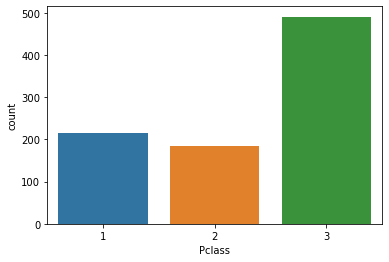

In [72]:
# First we check the Pclass column

sns.countplot(x='Pclass', data=df)
plt.show()

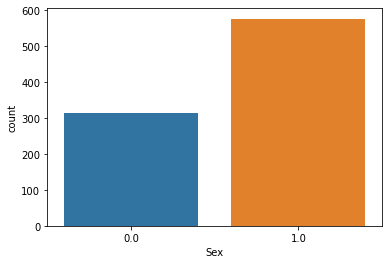

In [73]:
sns.countplot(x='Sex', data=df)
plt.show()

In [74]:
# we can see male passenger are more the female passanger

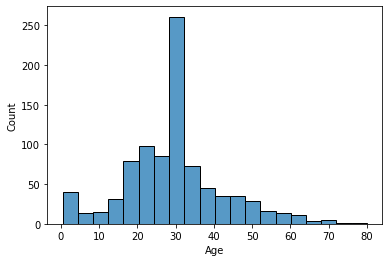

In [75]:
sns.histplot(data=df, x='Age', bins=20)
plt.show()

In [76]:
# we can see passenge whoes age 30 is more

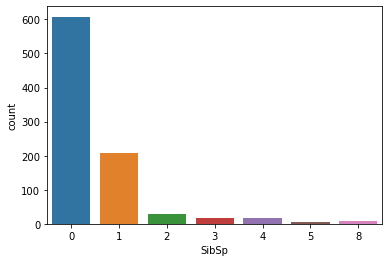

In [77]:
sns.countplot(x='SibSp', data=df)
plt.show()

In [78]:
# shorting the numbric and object data type
number=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        number.append(i)
print('Niumberic_col', number) 

print('\n')

category=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category.append(i)
print('Category_col', category)

Niumberic_col ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Category_col []


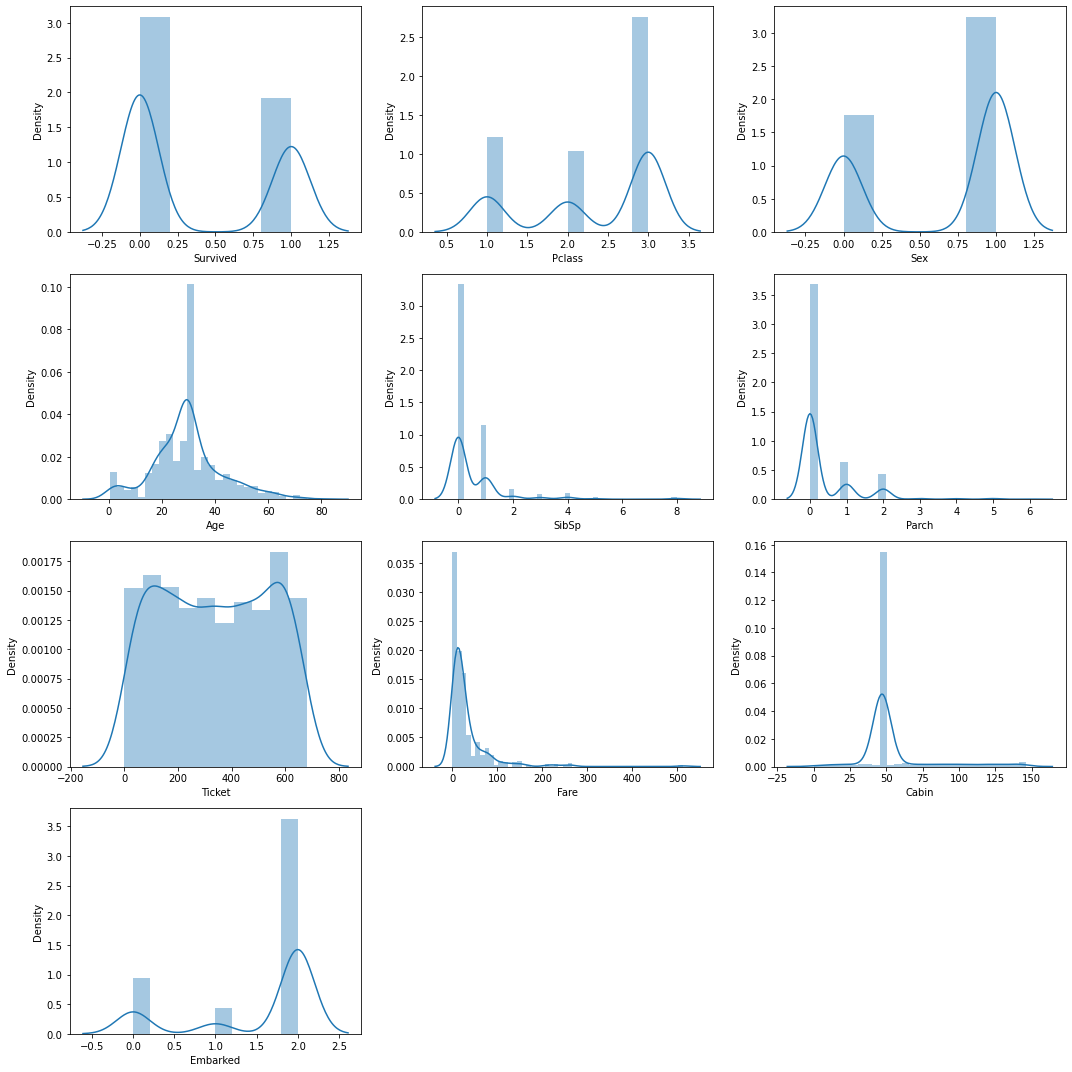

In [79]:
plt.figure(figsize=(15, 15))
plotnumber = 1

for i in number:
    if plotnumber <= 12:
        axs = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()


In [80]:
# Distribution looks fine

In [81]:
x=df.drop(columns='Survived')
y=df['Survived']

In [82]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1.0,22.000000,1,0,523.0,7.2500,47.0,2.0
1,1,1,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
2,1,3,0.0,26.000000,0,0,669.0,7.9250,47.0,2.0
3,1,1,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
4,0,3,1.0,35.000000,0,0,472.0,8.0500,47.0,2.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,101.0,13.0000,47.0,2.0
887,1,1,0.0,19.000000,0,0,14.0,30.0000,30.0,2.0
888,0,3,0.0,29.699118,1,2,675.0,23.4500,47.0,2.0
889,1,1,1.0,26.000000,0,0,8.0,30.0000,60.0,0.0


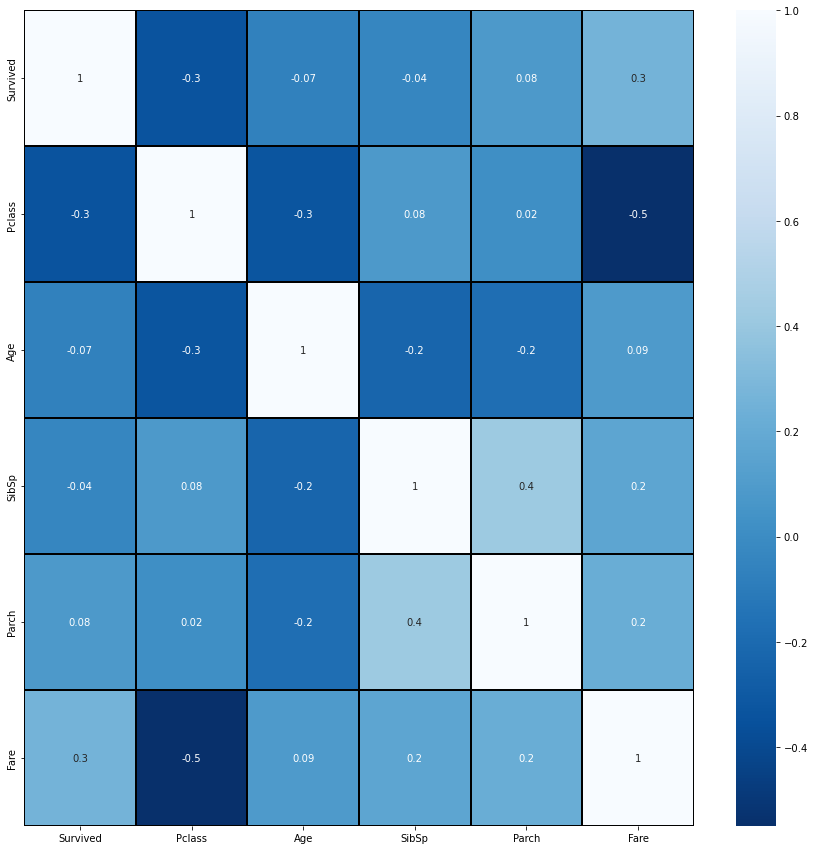

In [101]:
# lets visulize in heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, linecolor='black', cmap='Blues_r', fmt='.1g',linewidths=0.1)
plt.show()

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,0.918966,-0.502445,-0.281881,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,1.282625,0.786845,1.161545,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,-0.281881,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.057748,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,0.664904,-0.486337,-0.281881,0.585954
...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-1.183277,-0.386671,-0.281881,0.585954
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-1.616678,-0.044381,-1.003594,0.585954
888,0.827377,-1.355574,0.000000,0.432793,2.008933,1.676173,-0.176263,-0.281881,0.585954
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-1.646568,-0.044381,0.270017,-1.942303


In [85]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [92]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [93]:
# checking accuracy for Rnndom Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.7985074626865671
[[138  19]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.80      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [94]:
# Our accuracy with random forest classifirer is 79%

In [95]:
# check the LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.8134328358208955
[[138  19]
 [ 31  80]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [96]:
# Accuracy with logisctic regression is 81 %

In [97]:
# Check with Adaboostclassifier

ADB=AdaBoostClassifier()
ADB.fit(x_test,y_test)
pred_ADB=ADB.predict(x_test)
print(accuracy_score(y_test,pred_ADB))
print(confusion_matrix(y_test,pred_ADB))
print(classification_report(y_test,pred_ADB))

0.9029850746268657
[[145  12]
 [ 14  97]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       157
           1       0.89      0.87      0.88       111

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



In [98]:
# Accuracy with adaboos is 90%

In [100]:
# We can see that best accuracy is with adaboost 90%